# Loan dataset analysis

In [117]:
import pandas as pd
import numpy as np
from pandas.api.types import is_integer_dtype
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('../data/kaggle/loan/loan-10k.lrn.csv')

print(f"{len(df.columns) - 2} attributes + ID + target (grade), {len(df)} samples\n")

print("Basic Information:")
print(df.info())

90 attributes + ID + target (grade), 10000 samples

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   loan_amnt                   10000 non-null  float64
 2   funded_amnt                 10000 non-null  float64
 3   funded_amnt_inv             10000 non-null  float64
 4   term                        10000 non-null  object 
 5   int_rate                    10000 non-null  float64
 6   installment                 10000 non-null  float64
 7   emp_length                  10000 non-null  object 
 8   home_ownership              10000 non-null  object 
 9   annual_inc                  10000 non-null  float64
 10  verification_status         10000 non-null  object 
 11  loan_status                 10000 non-null  object 
 12  pymnt_plan        

I don't think there are any missing values, no NaN, - or anything like that.

# 

## Separate + check columns

### id + target

id: ID (10000)
target: grade (7): ['A' 'B' 'C' 'D' 'E' 'F' 'G']


<Axes: >

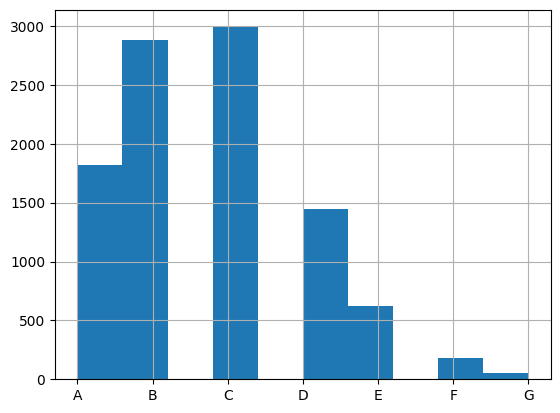

In [118]:
binary = []
categorical = []
ordinal = []
numeric = []
removed = []
columns = df.columns[1:-1].to_list()
print(f"id: ID ({df["ID"].nunique()})")
print(f"target: grade ({df["grade"].nunique()}): {df["grade"].sort_values().unique()}")

df["grade"].sort_values().hist()

### objects

In [119]:
object_cols = [col for col in columns if df[col].dtype == object]

print(f"total objects: {len(object_cols)}")
for col in object_cols:
    print(col + f" ({str(df[col].nunique())}): {df[col].sort_values().unique()}")

# emp_length as ordinal
object_cols.remove("emp_length")
enc = OrdinalEncoder(categories=[['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years' ]])
df[["emp_length"]] = enc.fit_transform(df[["emp_length"]])
ordinal.append("emp_length")

# rest is either binary or categorical
binary.extend([col for col in object_cols if df[col].nunique() == 2])
categorical.extend([col for col in object_cols if df[col].nunique() > 2])


total objects: 13
term (2): [' 36 months' ' 60 months']
emp_length (11): ['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
home_ownership (5): ['ANY' 'MORTGAGE' 'OTHER' 'OWN' 'RENT']
verification_status (3): ['Not Verified' 'Source Verified' 'Verified']
loan_status (6): ['Charged Off' 'Current' 'Fully Paid' 'In Grace Period'
 'Late (16-30 days)' 'Late (31-120 days)']
pymnt_plan (2): ['n' 'y']
purpose (13): ['car' 'credit_card' 'debt_consolidation' 'home_improvement' 'house'
 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
addr_state (50): ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
initial_list_status (2): ['f' 'w']
application_type (2): ['Individual' 'Joint Ap

* 13 that got parsed as object
* All categorical
* Most nominal, some could be considered ordinal (e.g. term, emp_lengh, loan status)
* addr_state has 50 unique values, a lot for a categorical variable

### ints

In [120]:
int_cols = [col for col in columns if is_integer_dtype(df[col])]

print(f"total ints: {len(int_cols)}")
for col in int_cols:
    print(col + f" ({str(df[col].nunique())}): {df[col].sort_values().unique() if df[col].nunique() <= 100 else "-"}")

ordinal.extend(int_cols)

total ints: 8
issue_d_month (12): [ 0  1  2  3  4  5  6  7  8  9 10 11]
issue_d_year (7): [2012 2013 2014 2015 2016 2017 2018]
earliest_cr_line_month (12): [ 0  1  2  3  4  5  6  7  8  9 10 11]
earliest_cr_line_year (51): [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015]
last_pymnt_d_month (12): [ 0  1  2  3  4  5  6  7  8  9 10 11]
last_pymnt_d_year (8): [2012 2013 2014 2015 2016 2017 2018 2019]
last_credit_pull_d_month (12): [ 0  1  2  3  4  5  6  7  8  9 10 11]
last_credit_pull_d_year (8): [2012 2013 2014 2015 2016 2017 2018 2019]


* 8 that got parsed as integers
* All month/year so I would say all interval data (order with fixed units inbetween)

In [121]:
float_cols = [col for col in columns if df[col].dtype == float]

print(f"total floats: {len(float_cols)}")
for col in float_cols:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 100 else "-"}")

total floats: 70
loan_amnt (821): -
funded_amnt (821): -
funded_amnt_inv (917): -
int_rate (338): -
installment (6421): -
emp_length (11): [ 0.  1.  9. 10.  3.  4.  7.  2.  5.  6.  8.]
annual_inc (1292): -
dti (3308): -
delinq_2yrs (15): [ 0.  1.  2.  5.  3.  4.  8.  6. 16.  7.  9. 13. 12. 11. 10.]
fico_range_low (38): [715. 670. 665. 675. 660. 750. 705. 680. 700. 690. 710. 685. 720. 765.
 695. 740. 730. 795. 745. 735. 835. 725. 785. 780. 755. 820. 805. 770.
 800. 815. 760. 775. 790. 810. 840. 825. 830. 845.]
fico_range_high (38): [719. 674. 669. 679. 664. 754. 709. 684. 704. 694. 714. 689. 724. 769.
 699. 744. 734. 799. 749. 739. 839. 729. 789. 784. 759. 824. 809. 774.
 804. 819. 764. 779. 794. 814. 844. 829. 834. 850.]
inq_last_6mths (7): [1. 0. 3. 2. 5. 4. 6.]
open_acc (47): [29. 22.  5. 12. 19. 13. 11. 14.  8. 16.  7.  6. 20.  4. 10.  9. 17. 15.
 30. 18. 23. 33. 24. 28. 25. 32. 21. 27. 26.  3. 35. 63. 31. 44. 52. 53.
  2. 36. 38. 37. 42. 40. 34. 39. 46. 43. 45.]
pub_rec (8): [0. 1.

* lots of float variables
* policy_code has only one entry => remove it
* the following can be considered ordinal:

In [122]:
# delete column with only one value
for col in float_cols:
    if df[col].nunique() <= 1:
        print(f"drop {col}")
        removed.append(col)
        float_cols.remove(col)
        df.drop(columns=[col])

# find binaries
for col in float_cols:
    if df[col].nunique() == 2:
        print(f"{col} is binary: {df[col].unique()}")
        binary.append(col)
        float_cols.remove(col)

print("")

candidates = [col for col in float_cols if df[col].nunique() <= 100 and max(df[col]) - min(df[col]) == df[col].nunique()-1]

for col in candidates:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique()}")

# All ordinals
ordinal.extend(candidates)

drop policy_code
num_tl_120dpd_2m is binary: [0. 1.]

emp_length (11): [ 0.  1.  9. 10.  3.  4.  7.  2.  5.  6.  8.]
inq_last_6mths (7): [1. 0. 3. 2. 5. 4. 6.]
pub_rec (8): [0. 1. 2. 3. 4. 5. 6. 7.]
collections_12_mths_ex_med (4): [0. 1. 2. 3.]
acc_now_delinq (3): [0. 1. 2.]
chargeoff_within_12_mths (4): [0. 2. 1. 3.]
mths_since_recent_inq (25): [ 3.  4.  0.  5.  8. 11.  7. 10.  1. 14. 21. 13. 19. 12. 18.  6.  2. 15.
 22. 20.  9. 17. 16. 24. 23.]
num_tl_30dpd (3): [0. 1. 2.]
num_tl_90g_dpd_24m (11): [ 0.  1.  2.  3.  6.  4.  5.  8. 10.  7.  9.]
num_tl_op_past_12m (18): [ 3.  2.  1.  0.  4.  7. 10.  5.  6.  8.  9. 11. 14. 12. 13. 16. 15. 17.]
tax_liens (8): [0. 1. 2. 3. 4. 5. 6. 7.]


### Try to find some more categorical ones / ordinals with gaps:

In [123]:
remaining = [col for col in columns if not col in ordinal and not col in categorical and not col in binary]
candidates = [col for col in remaining if df[col].nunique() <= 30 and max(df[col])]
numeric.extend([col for col in remaining if col not in candidates]) # more than 100 values, too much to handle categorical

for col in candidates:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 30 else "-"}")

# Add delinq_amnt as numeric (large value range)
candidates.remove("delinq_amnt")
numeric.append("delinq_amnt")

# Add the remaining as ordinal
ordinal.extend(candidates)

delinq_2yrs (15): [ 0.  1.  2.  5.  3.  4.  8.  6. 16.  7.  9. 13. 12. 11. 10.]
policy_code (1): [1.]
acc_open_past_24mths (27): [12.  4.  6.  9.  1.  5.  2.  3.  7. 11.  0. 10.  8. 23. 18. 13. 14. 17.
 15. 16. 19. 20. 22. 21. 28. 24. 37.]
delinq_amnt (29): [0.0000e+00 1.8380e+03 1.5765e+04 1.8200e+03 2.5000e+01 5.6800e+02
 6.0000e+01 3.5300e+02 1.0040e+03 4.5000e+01 1.8778e+04 3.3000e+01
 7.9800e+02 5.9000e+01 1.8700e+02 6.3800e+02 3.6787e+04 3.7300e+02
 4.1000e+01 3.7000e+01 3.2300e+02 7.8000e+01 1.0370e+03 7.0000e+01
 5.7000e+01 2.0000e+00 2.7000e+01 7.3000e+01 5.3000e+01]
mort_acc (17): [ 1.  5.  0.  2.  3.  4.  7.  8.  6.  9. 10. 11. 12. 17. 46. 13. 14.]
num_accts_ever_120_pd (22): [ 1.  0.  2.  7.  3. 10.  4.  8.  9.  5.  6. 16. 12. 14. 11. 27. 23. 15.
 22. 25. 13. 17.]
num_actv_bc_tl (22): [11.  4.  3. 10.  6.  1.  2.  5.  7.  8. 16.  9. 12. 18.  0. 14. 23. 13.
 15. 29. 17. 19.]
num_bc_sats (28): [12.  5.  4. 11.  6.  1.  2.  9.  3.  7.  8. 10. 16. 14. 17. 15. 19. 13.
 18. 34. 2

In [128]:
df = df.astype({col: "category" for col in binary}) # TODO: @ Adam: What's the correct type for binary categorical? Iirc you wanted to separate them?
df = df.astype({col: "category" for col in categorical})
df = df.astype({col: "int" for col in ordinal})
df = df.astype({col: "float" for col in numeric})

[col for col in columns if not col in ordinal and not col in categorical and not col in numeric and not col in binary] == []

True

In [129]:
#Binary
for col in binary:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 30 else "-"}")

term (2): [' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']
pymnt_plan (2): ['n', 'y']
Categories (2, object): ['n', 'y']
initial_list_status (2): ['w', 'f']
Categories (2, object): ['f', 'w']
application_type (2): ['Individual', 'Joint App']
Categories (2, object): ['Individual', 'Joint App']
hardship_flag (2): ['N', 'Y']
Categories (2, object): ['N', 'Y']
disbursement_method (2): ['Cash', 'DirectPay']
Categories (2, object): ['Cash', 'DirectPay']
debt_settlement_flag (2): ['N', 'Y']
Categories (2, object): ['N', 'Y']
num_tl_120dpd_2m (2): [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


In [132]:
# Categorical
for col in categorical:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 30 else "-"}")

home_ownership (5): ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER']
Categories (5, object): ['ANY', 'MORTGAGE', 'OTHER', 'OWN', 'RENT']
verification_status (3): ['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']
loan_status (6): ['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']
Categories (6, object): ['Charged Off', 'Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']
purpose (13): ['debt_consolidation', 'car', 'credit_card', 'other', 'major_purchase', ..., 'vacation', 'moving', 'house', 'renewable_energy', 'wedding']
Length: 13
Categories (13, object): ['car', 'credit_card', 'debt_consolidation', 'home_improvement', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']
addr_state (50): -


In [131]:
# Ordinal
for col in ordinal:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 30 else "-"}")

emp_length (11): [ 0  1  9 10  3  4  7  2  5  6  8]
issue_d_month (12): [ 6 10  9  0 11  4  3  5  1  7  8  2]
issue_d_year (7): [2018 2015 2017 2016 2014 2013 2012]
earliest_cr_line_month (12): [ 6  9 10  0 11  7  3  4  1  8  5  2]
earliest_cr_line_year (51): -
last_pymnt_d_month (12): [ 2  1  6  3  7 10  4  5  0 11  8  9]
last_pymnt_d_year (8): [2019 2018 2016 2017 2014 2015 2013 2012]
last_credit_pull_d_month (12): [ 2 11  9  3  0  7  1  4 10  6  5  8]
last_credit_pull_d_year (8): [2019 2018 2017 2016 2014 2015 2013 2012]
emp_length (11): [ 0  1  9 10  3  4  7  2  5  6  8]
inq_last_6mths (7): [1 0 3 2 5 4 6]
pub_rec (8): [0 1 2 3 4 5 6 7]
collections_12_mths_ex_med (4): [0 1 2 3]
acc_now_delinq (3): [0 1 2]
chargeoff_within_12_mths (4): [0 2 1 3]
mths_since_recent_inq (25): [ 3  4  0  5  8 11  7 10  1 14 21 13 19 12 18  6  2 15 22 20  9 17 16 24
 23]
num_tl_30dpd (3): [0 1 2]
num_tl_90g_dpd_24m (11): [ 0  1  2  3  6  4  5  8 10  7  9]
num_tl_op_past_12m (18): [ 3  2  1  0  4  7 10  5

In [133]:
# Numeric
for col in numeric:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 30 else "-"}")

loan_amnt (821): -
funded_amnt (821): -
funded_amnt_inv (917): -
int_rate (338): -
installment (6421): -
annual_inc (1292): -
dti (3308): -
fico_range_low (38): -
fico_range_high (38): -
open_acc (47): -
revol_bal (8601): -
revol_util (1011): -
total_acc (85): -
out_prncp (3996): -
out_prncp_inv (4001): -
total_pymnt (9915): -
total_pymnt_inv (9891): -
total_rec_prncp (5711): -
total_rec_int (9797): -
total_rec_late_fee (299): -
recoveries (786): -
collection_recovery_fee (767): -
last_pymnt_amnt (8458): -
last_fico_range_high (72): -
last_fico_range_low (71): -
tot_coll_amt (945): -
tot_cur_bal (9809): -
total_rev_hi_lim (1342): -
avg_cur_bal (8270): -
bc_open_to_buy (7702): -
bc_util (1044): -
mo_sin_old_il_acct (326): -
mo_sin_old_rev_tl_op (502): -
mo_sin_rcnt_rev_tl_op (126): -
mo_sin_rcnt_tl (67): -
mths_since_recent_bc (197): -
num_actv_rev_tl (31): -
num_bc_tl (38): -
num_il_tl (64): -
num_op_rev_tl (40): -
num_rev_accts (61): -
num_sats (47): -
pct_tl_nvr_dlq (291): -
percent_

In [134]:
# Removed
for col in removed:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 30 else "-"}")

policy_code (1): [1]


In [ ]:
# TODO: Export to pkl format + export processed csv